# CPSC529:02_KNN

Note: Adapted from STAT 451: Intro to Machine Learning (Fall 2020)  

- Instructor: Sebastian Raschka (sraschka@wisc.edu)   
- Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat451-fs2020/

## 0 - General Imports

I always find it helpful to put all the imports being used in the notebook into one cell somewhere at the top. This way, it is easy to tell what will be required for running the code in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1 - Loading Iris Data

**Note**: Original dataset has four features: SepalLength[cm], SepalWidth[cm], PetalLength[cm], PetalWidth[cm]. We only pick two features only 

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Note: Original dataset has four features: SepalLength[cm], SepalWidth[cm], 
#      PetalLength[cm], PetalWidth[cm]. We only pick last two features only
iris = load_iris()
X, y = iris.data[:, 2:], iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=123,
                                                    shuffle=True)

## 2 - k-Nearest Neighbor Model

Next, we are going to use the `KNeighborsClassifier` class from scikit-learn and instantiate a new KNN object, which we call `knn_model`. Then, we "fit" this model the training dataset:

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
y_pred = knn_clf.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 96.67%


## 3 - Visualize Decision Boundary

Usually, in machine learning, we work with datasets that have more then 2 feature variables. For educational purposes, however, we chose a very simple dataset consisting of only two features here (the petal length and the petal width of Iris flowers). If we have only two features, we can easily visualize the decision boundary of the model -- here, we will be using a convenience function I implemented in the MLxtend library:

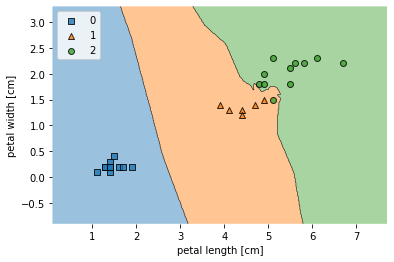

In [10]:
# note: install "conda install -c conda-forge mlxtend"
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_test, y_test, knn_clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()